# Introduction
If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains. of wheat would be on the chessboard at the finish?

The problem is to find the final number of wheat grains on an 8x8 chessboard by placing them in the order 1, 2, 4.

In [155]:
#predefines and imports
import numpy as np
import matplotlib.pyplot as plt

## Sample Codes

In [156]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

small_board_ndarray = np.array(small_board_list)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]
Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


# Problem 1
## 2x2 Chess board

In [157]:
def problem1():
    n = 4
    row = 2
    col = n//row
    board = []
    for i in range(row):
        row = []
        for j in range(col):
            row.append(2**(col*i + j))
        board.append(row)
    board_np = np.array(board)
    print('2x2 board: ')
    print(board_np)

problem1()

2x2 board: 
[[1 2]
 [4 8]]


# Problem 2
## General Chess Board

In [158]:
def chess_board_wheat(n,m):
    board = []
    row = [1]
    for i in range(n):
        row = [row[-1]]
        for j in range(m):
            row.append(2**(m*i + j))
        board.append(row)
    return np.array(board)
def problem2(): 
    print('8x8 board:')
    print(chess_board_wheat(8,8))

problem2()

8x8 board:
[[1.00000000e+00 1.00000000e+00 2.00000000e+00 4.00000000e+00
  8.00000000e+00 1.60000000e+01 3.20000000e+01 6.40000000e+01
  1.28000000e+02]
 [1.28000000e+02 2.56000000e+02 5.12000000e+02 1.02400000e+03
  2.04800000e+03 4.09600000e+03 8.19200000e+03 1.63840000e+04
  3.27680000e+04]
 [3.27680000e+04 6.55360000e+04 1.31072000e+05 2.62144000e+05
  5.24288000e+05 1.04857600e+06 2.09715200e+06 4.19430400e+06
  8.38860800e+06]
 [8.38860800e+06 1.67772160e+07 3.35544320e+07 6.71088640e+07
  1.34217728e+08 2.68435456e+08 5.36870912e+08 1.07374182e+09
  2.14748365e+09]
 [2.14748365e+09 4.29496730e+09 8.58993459e+09 1.71798692e+10
  3.43597384e+10 6.87194767e+10 1.37438953e+11 2.74877907e+11
  5.49755814e+11]
 [5.49755814e+11 1.09951163e+12 2.19902326e+12 4.39804651e+12
  8.79609302e+12 1.75921860e+13 3.51843721e+13 7.03687442e+13
  1.40737488e+14]
 [1.40737488e+14 2.81474977e+14 5.62949953e+14 1.12589991e+15
  2.25179981e+15 4.50359963e+15 9.00719925e+15 1.80143985e+16
  3.60287970e

# Problem 3
## Total Wheat

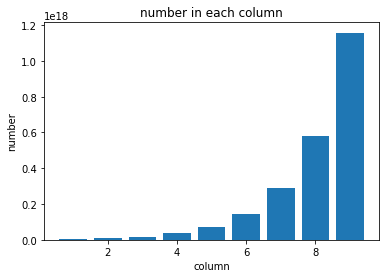

In [159]:
def problem3():
    board = chess_board_wheat(8,8)
    col_avg = np.average(board,axis=0)
    %matplotlib inline
    plt.xlabel("column")
    plt.ylabel("number")
    plt.title("number in each column")
    plt.bar(np.arange(1,col_avg.shape[0]+1), col_avg)
    plt.show()

problem3()

# Problem 4
## Heat Map Board

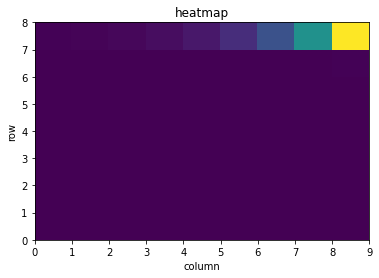

In [160]:
def problem4():
    board = chess_board_wheat(8,8)
    plt.xlabel("column")
    plt.ylabel("row")
    plt.title("heatmap")
    plt.pcolor(board)
    plt.show()

problem4()

# Problem 5
## Second Half vs First Half

In [161]:
def problem5():
    board = chess_board_wheat(8,8)
    first_half = board[:4]
    second_half = board[4:]
    sum1 = np.sum(first_half)
    sum2 = np.sum(second_half)
    print('Sum First Half: ', sum1)
    print('Sum Second Half: ' , sum2)
    print('Ratio SecondH over FirstH: ', sum2/sum1)
    
problem5()

Sum First Half:  4303388800.0
Sum Second Half:  1.84829141558252e+19
Ratio SecondH over FirstH:  4294967295.5009785


## Another Array Creating Method
### Sample Code For np.append and Broadcast

In [162]:
n_squares = 4
#append
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("Arrange wheat on a plate of 4 squares (ndarray) - append：{}".format(small_board_ndarray))
#broadcast
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("Arrange wheat on a plate of 4 squares (ndarray) - broadcase：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray) - append：[1 2 4 8]
Arrange wheat on a plate of 4 squares (ndarray) - broadcase：[1 2 4 8]


## Type in numpy
### Type conversion to avoid overflow

In [163]:
#NOTE: overflow ex
n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("Number of wheat in the last trout：{}".format(board_ndarray[-1])) # -9223372036854775808

Number of wheat in the last trout：0
<ipython-input-163-c3e85944e544>:5: RuntimeWarning: overflow encountered in long_scalars
  board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])


In [164]:
#NOTE: conversion example to avoid error
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("Number of wheat in the last trout：{}".format(board_ndarray[-1])) # 9223372036854775808

Number of wheat in the last trout：9223372036854775808


# Problem 6
## Use numpy functionality to create board

In [165]:
def board_np_append(n,m):
    board = np.array([1]).astype(np.uint64)
    for _ in range(m*n-1):
        board = np.append(board, 2*board[-1])
    board.reshape((n,m))
    return board
def board_np_broadcast(n,m):
    board = np.arange(0,n*m).reshape(n,m).astype(np.uint64)
    return 2**board

print(board_np_append(8,8))
print(board_np_broadcast(8,8))

[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
 1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
 2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
 4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
 6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
 1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06
 1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
 2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09
 4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
 6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11
 1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
 1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14
 2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
 4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16
 7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
 1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]
[[                  1  

### CAUTION NOTE!
I do not understand why problem 6 has different print output for the two matrixes.

** Please comment if you know why!**


# Problem 7
## Time measurement

Using naive append method

In [166]:
%%timeit
chess_board_wheat(8,8)

44.3 µs ± 914 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Numpy append method where we append the last element multiply by 2

In [167]:
%%timeit
board_np_append(8,8)

447 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Numpy broadcast method, simple and fast

In [168]:
%%timeit
board_np_broadcast(8,8)

4.19 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Conclution
It's clear that the np broadcast method is the fastest, and is the developer's intended way to build big matrix fast, efficiently. The other two methods are not nearly as fast compared to this.

But, looking at the naive append method vs the np.append method, my suspection would be that the np.append method is slower due to dimension checking to ensure that the two arrays matches while python's list append just do it's thing. Or it's the fact that np.array is more complex and thus take more time to create, append compared to python generic list

** What's your opinion? **